In the below cell we will collect the data into a list of strings.

In [157]:

myString = "10 2.18 20 2.40 30 2.52 40 2.60 50 2.66 60 2.70 70 2.72 80 2.75 90 2.77 100 2.92 2.80 120 2.99 2.85 140 " \
           "2.97 2.91 160 2.99 2.98 180 3.05 3.08 200 3.12 3.19 220 3.17 3.32 240 3.25 3.45 260 3.45 3.58 280 3.65 " \
           "3.69 300 3.71 3.78 320 3.79 3.84 340 3.86 3.88 360 3.92 3.95 380 3.96 4.03 400 3.99 4.11 420 4.02 4.19 " \
           "440 4.08 4.27 460 4.17 4.34 480 4.28 4.42 500 4.41 4.50 520 4.54 4.58 540 4.65 4.66 560 4.74 4.74 580 " \
           "4.79 4.82 600 4.82 4.89"

otherData = "2.34 2.43 3.45 2.59 2.53 3.51 2.70 2.66 3.57 2.78 2.82 3.71 2.87 2.92 3.79 2.91 3.15 3.83 2.93 3.21 3.84 " \
            "2.96 3.24 3.84 2.99 3.24 3.82 3.02 3.23 3.80 3.08 3.21 3.78 3.15 3.22 3.80 3.23 3.28 3.81 3.31 3.40 3.82 " \
            "3.42 3.55 3.87 3.53 3.70 3.92 3.64 3.84 3.97 3.74 3.93 4.03 3.83 4.00 4.10 3.90 4.04 4.20 3.95 4.12 4.31 " \
            "4.02 4.26 4.44 4.11 4.41 4.56 4.21 4.55 4.66 4.30 4.69 4.75 4.40 4.83 4.84 4.49 4.97 4.94 4.58 5.11 5.03 " \
            "4.68 5.25 5.13 4.77 5.40 5.22 4.87 5.54 5.32 4.96 5.68 5.41 5.06 5.82 5.51 5.15 5.96 5.60 5.25 6.10 5.70"

mySplitString = myString.split(" ")

otherSplitString = otherData.split(" ")


In the below cell we will convert this list of string of data into a list of float point values

In [158]:
valueList1 = list()
valueList2 = list()

for strVal in mySplitString:
    valueList1.append(float(strVal))


for strVal in otherSplitString:
    valueList2.append(float(strVal))




In the next cell we will collect the data to become a training database

In [159]:
teeData = dict()
fairwayData = dict()
roughData = dict()
sandData = dict()
recoveryData = dict()

string1 = 0
string2 = 0
while string2 < otherSplitString.__len__():
    yardage = valueList1[string1]
    string1 += 1
    if yardage >= 100:
        teeData[yardage] = valueList1[string1]
        string1 += 1

    fairwayData[yardage] = valueList1[string1]
    string1 += 1

    roughData[yardage] = valueList2[string2]
    string2 += 1

    sandData[yardage] = valueList2[string2]
    string2 += 1

    recoveryData[yardage] = valueList2[string2]
    string2 += 1



In the below cell we will plot this data

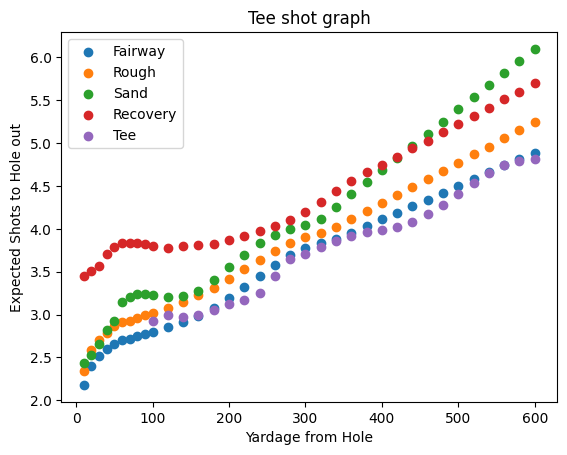

In [163]:
import matplotlib.pyplot as plt

teeYardages = list()
yardages = list()
tee = list()
fairway = list()
rough = list()
sand = list()
recovery = list()

for yardageVal in teeData.keys():
    tee.append(teeData[yardageVal])
    teeYardages.append(yardageVal)

for yardageVal in fairwayData.keys():
    yardages.append(yardageVal)
    fairway.append(fairwayData[yardageVal])
    rough.append(roughData[yardageVal])
    sand.append(sandData[yardageVal])
    recovery.append(recoveryData[yardageVal])



plt.scatter(yardages, fairway, label = "Fairway")
plt.scatter(yardages, rough, label = "Rough")
plt.scatter(yardages, sand, label = "Sand")
plt.scatter(yardages, recovery, label = "Recovery")
plt.scatter(teeYardages, tee, label = "Tee")

plt.xlabel('Yardage from Hole')

plt.ylabel('Expected Shots to Hole out')

# giving a title to my graph
plt.title('Tee shot graph')

plt.legend()

# function to show the plot
plt.show()



In the below cell we contruct a polynomial regression model

KeyboardInterrupt: 

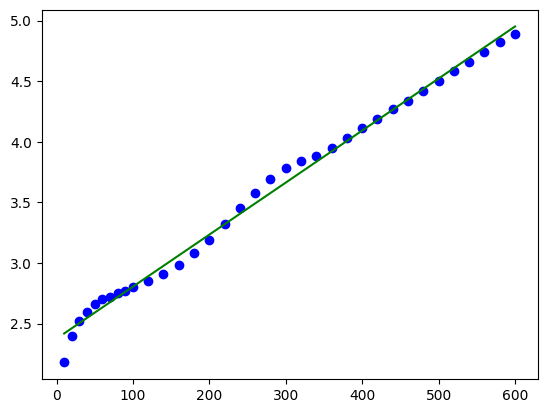

In [164]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


yData = [fairway, rough, sand, recovery]

yPredicted = list()

yardages = np.asarray(yardages)


i = 0

for data in yData:
    currentBest = 2
    currentFit = -100
    for degree in range(2, 14):

        poly = PolynomialFeatures(degree = degree, include_bias = False)

        poly_features = poly.fit_transform(yardages.reshape(-1, 1))

        poly_reg_model = LinearRegression()

        poly_reg_model.fit(poly_features, data)

        y_poly_pred = poly_reg_model.predict(poly_features)

        rootMeanSquaredError = np.sqrt(mean_squared_error(data, y_poly_pred))

        if currentFit < rootMeanSquaredError:
            currentBest = degree
            currentFit = rootMeanSquaredError



    poly = PolynomialFeatures(degree = currentBest, include_bias = False)

    poly_features = poly.fit_transform(yardages.reshape(-1, 1))

    poly_reg_model = LinearRegression()

    poly_reg_model.fit(poly_features, data)

    yPredicted.append(poly_reg_model.predict(poly_features))

    print(i)
    print(currentBest)
    print(poly_features)

    i += 1





# for regressionModel in yPredicted:
#     plt.plot(yardages, regressionModel)



# plt.scatter(yardages, fairway, label = "Fairway")
# plt.scatter(yardages, rough, label = "Rough")
# plt.scatter(yardages, sand, label = "Sand")
# plt.scatter(yardages, recovery, label = "Recovery")
# plt.scatter(teeYardages, tee, label = "Tee")

plt.show()
